In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Deep learning/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64


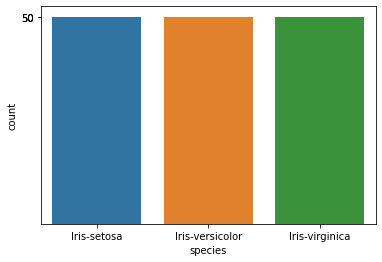

In [ ]:
print(df["species"].value_counts()) #we want to predict species ,this is target variable

#Visualise 
import seaborn as sns
sns.countplot(data=df,x="species")
c=df["species"].value_counts()
plt.yticks(c)
plt.show()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


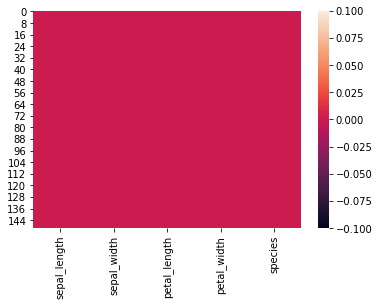

In [ ]:
#Check null value
print(df.isnull().sum())

#Visualise 
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#apply Label Encoder on species target column : - means to convert object type data into numeric type
from sklearn.preprocessing import LabelEncoder
#Create object of LabelEncoder class
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#Separate input and output from dataset
X=df.drop("species",axis=1)
Y=df["species"]

In [ ]:
#train test split : 70%-30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(105,)
(45,)


In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

2    37
0    36
1    32
Name: species, dtype: int64
1    18
0    14
2    13
Name: species, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

2    35
1    35
0    35
Name: species, dtype: int64
2    15
1    15
0    15
Name: species, dtype: int64


In [ ]:
#apply scaling on X_train and X_test data
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train

array([[-0.4301064 ,  2.63118533, -1.33269725, -1.30380366],
       [-0.55053619,  0.76918392, -1.16537974, -1.30380366],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44465434],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18289644],
       [-1.03225536,  0.30368356, -1.44424226, -1.30380366],
       [ 1.0150511 ,  0.07093339,  1.0097479 ,  1.57553329],
       [ 2.09891923, -0.16181679,  1.56747294,  1.18289644],
       [-0.06881702,  2.16568498, -1.44424226, -1.30380366],
       [ 1.61720006, -0.16181679,  1.12129291,  0.52850167],
       [ 0.89462131, -0.39456697,  0.45202286,  0.13586482],
       [-1.03225536, -1.79106803, -0.27301968, -0.25677204],
       [-0.79139578, -0.86006732,  0.06161534,  0.26674377],
       [-1.39354474,  0.30368356, -1.38846976, -1.30380366],
       [ 0.29247235, -0.62731714,  0.50779537,  0.00498586],
       [-0.4301064 , -1.32556767,  0.11738784,  0.13586482],
       [-0.06881702, -0.86006732,  0.73088538,  0.92113853],
       [-1.27311494,  0.

In [ ]:
#Create Neural network architecture DNN (Deep Neural Network)
import tensorflow as tf
#create object of Sequential  class
model=tf.keras.Sequential([
            tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)), #hidden layer1  
             tf.keras.layers.Dense(3,activation='relu'), #second hidden layer
              tf.keras.layers.Dense(3,activation='softmax') #output layer          
])

In [ ]:
#to display summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#first Hidden layer : 4*2+2=10
#second hidden layer : 2*3+3=9
#output layer : 3*3+3=12 
#total parameter =31

In [ ]:
#Compile the  model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
#this give loss of training and accuracy of training 

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=50,batch_size=20)

Epoch 1/50
6/6 [==============================] - 0s 3ms/step - loss: 1.1395 - accuracy: 0.3429
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 1.1235 - accuracy: 0.3143
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.1088 - accuracy: 0.3143
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0950 - accuracy: 0.3143
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.3238
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.3143
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0594 - accuracy: 0.3143
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0502 - accuracy: 0.3333
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0407 - accuracy: 0.3429
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0318 - accuracy: 0.3714
Epoch 11/50
6/6 [======================

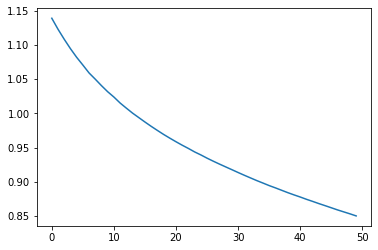

In [ ]:
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
#testing the model with 30% data means X_test
Y_pred=model.predict(X_test)
Y_pred

array([[0.25854504, 0.34160718, 0.39984778],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.37188128, 0.3694201 , 0.2586986 ],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.12095831, 0.21621081, 0.6628309 ],
       [0.2723617 , 0.3504874 , 0.37715092],
       [0.02604824, 0.07231888, 0.90163296],
       [0.15669222, 0.25580987, 0.58749795],
       [0.10619863, 0.1980997 , 0.69570166],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.37327844, 0.3706646 , 0.25605693],
       [0.2367525 , 0.32630622, 0.43694136],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.35983944, 0.3742277 , 0.26593286],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.0489107 , 0.11473911, 0.83635014],
       [0.11273551, 0.2062591 , 0.68100536],
       [0.36477622, 0.37355754, 0.26166627],
       [0.15425402, 0.25328326, 0.59246266],
       [0.13009678, 0.22688384, 0.6430194 ],
       [0.02156106, 0.06285672, 0.9155822 ],
       [0.37483212, 0.3720463 , 0.25312155],
       [0.

In [ ]:
#select highest probability from Y_pred 
Y_pred=Y_pred.argmax(axis=1) #argmax() inbuikt function : to find maximum probability
print(Y_pred)

[2 0 0 0 2 2 2 2 2 0 0 2 0 1 0 2 2 1 2 2 2 0 2 1 1 2 1 2 0 1 0 0 2 1 2 2 0
 0 0 2 2 2 2 0 0]


In [ ]:
print(Y_test)

148    2
5      0
6      0
106    2
75     1
71     1
108    2
68     1
111    2
16     0
15     0
127    2
8      0
57     1
47     0
76     1
141    2
66     1
74     1
147    2
102    2
12     0
65     1
121    2
94     1
56     1
98     1
144    2
43     0
113    2
11     0
0      0
62     1
53     1
107    2
112    2
37     0
25     0
1      0
50     1
120    2
149    2
54     1
7      0
9      0
Name: species, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.71      0.33      0.45        15
           2       0.55      0.80      0.65        15

    accuracy                           0.71        45
   macro avg       0.73      0.71      0.69        45
weighted avg       0.73      0.71      0.69        45

Confusion Matrix
[[15  0  0]
 [ 0  5 10]
 [ 1  2 12]]
